In [6]:
from matplotlib import pyplot as plt
import numpy as np
import os
import json
import pandas as pd
import sys
sys.path.append("D:\\Research_CAE\\MyTinyCUDANN\\tiny-cuda-nn\\main")
from tools import get_lambda_curve,get_loss_curve,get_result_table
main_path = os.path.dirname(os.path.abspath("__file__"))
print(main_path)
figure_path = os.path.join(main_path, "figs")
fontsize = 18
plt.rcParams['font.size'] = fontsize
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 2

result_dict = {}

d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale


Lambda vs finial error

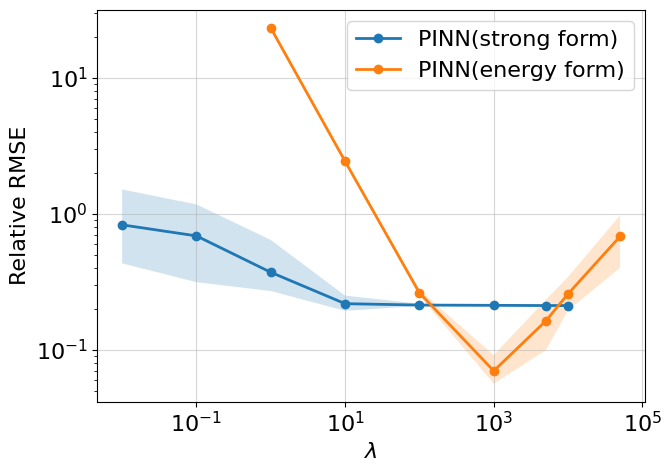

In [25]:
loss_name_list = [
    "PINN_lambda_ADAM_eps=1_sin",
    "PINN_energy_lambda_ADAM_eps=1_sin",
    # "GridMLP_standard",
]
label_list = [
    
    "PINN(strong form)",
    "PINN(energy form)",
    # "GridMLP(energy form)",
]

for loss_name in loss_name_list:
    loss_dict = get_lambda_curve(loss_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(7,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.2)
    i += 1
plt.xlabel(r"$\lambda$")
plt.ylabel("Relative RMSE")
plt.yscale("log")
plt.xscale("log")
plt.grid(alpha = 0.5)
plt.legend()
fig.tight_layout()
# plt.savefig(os.path.join(figure_path,"lambda_error.jpg"), dpi=300)
plt.show()

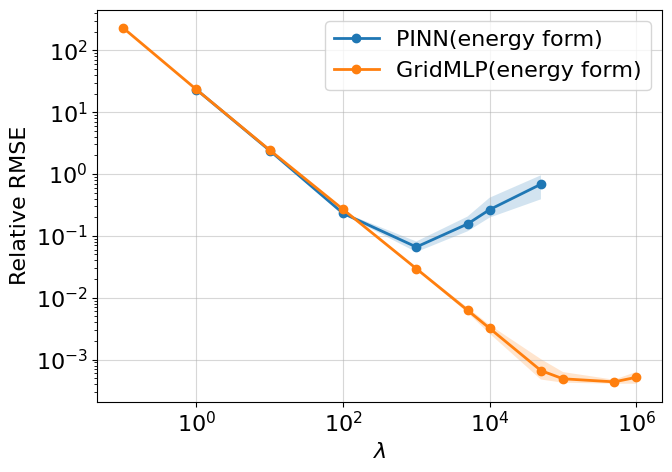

In [34]:
loss_name_list = [
    # "PINN_lambda_ADAM_sin",
    "PINN_energy_lambda_ADAM_sin",
    "GridMLP_standard",
]
label_list = [
    
    # "PINN(strong form)",
    "PINN(energy form)",
    "GridMLP(energy form)",
]

for loss_name in loss_name_list:
    loss_dict = get_lambda_curve(loss_name)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(7,5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.2)
    i += 1
plt.xlabel(r"$\lambda$")
plt.ylabel("Relative RMSE")
plt.yscale("log")
plt.xscale("log")
plt.grid(alpha = 0.5)
plt.legend()
fig.tight_layout()
plt.savefig(os.path.join(figure_path,"lambda_error.png"), dpi=300)
plt.show()

Loss curve 

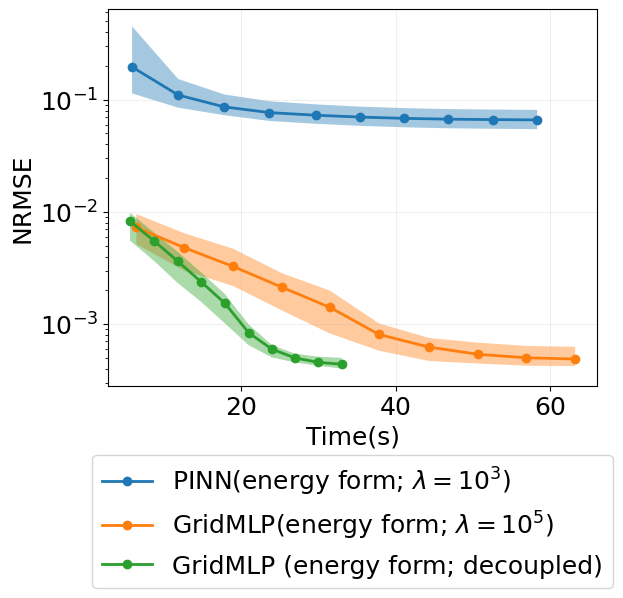

In [15]:
loss_name_list = [
# "PINN_lambda_ADAM_sin/config_5",
"PINN_energy_lambda_ADAM_sin/config_3",
"GridMLP_standard/config_8",
"GridMLP_decoupled/config_1",

]

label_list = [

# r"PINN(strong form; $\lambda = 10^{3}$)",
r"PINN(energy form; $\lambda = 10^{3}$)",
r"GridMLP(energy form; $\lambda = 10^{5}$)",
"GridMLP (energy form; decoupled)",
]

for loss_name in loss_name_list:
    task_name,dir_name = loss_name.split("/")
    loss_dict = get_loss_curve(task_name,dir_name,main_path)
    result_dict[loss_name] = loss_dict

fig = plt.figure(figsize=(6.5,6.5))
i = 0
for loss_name in loss_name_list:
    plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
    plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.4)
    i += 1
plt.xlabel("Time(s)")
plt.ylabel("NRMSE")
plt.yscale("log")
# plt.xscale("log")
plt.grid(alpha = 0.2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1)

fig.tight_layout()
plt.savefig(os.path.join(figure_path,"training_loss.png"), dpi=300)
plt.show()

In [32]:
result_dict['PINN_energy_lambda_ADAM_sin/config_3']['x']

array([ 5.87570138, 11.84649982, 17.80339966, 23.65319839, 29.64009831,
       35.37749739, 41.10149817, 46.82589631, 52.54639585, 58.3082973 ])

In [40]:
result_dict = get_result_table("GridMLP_decoupled_levels",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","n_levels"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,n_levels,error,time,error_min,error_max
config_0,16.0,0.0,4.0,0.000905,28.521093,0.000470,0.004270
config_1,32.0,2.0,4.0,0.101279,37.422694,0.060709,0.171261
config_2,16.0,0.0,8.0,0.001124,28.696093,0.000417,0.006856
config_3,32.0,2.0,8.0,0.013310,38.129675,0.001089,0.036177
config_4,16.0,0.0,12.0,0.000463,28.320973,0.000421,0.000518
config_5,32.0,2.0,12.0,0.000907,37.822491,0.000410,0.003781
config_6,16.0,0.0,16.0,0.000477,28.706293,0.000413,0.000574
config_7,32.0,2.0,16.0,0.000461,38.917193,0.000396,0.000619
config_8,16.0,0.0,20.0,0.000469,32.001864,0.000414,0.000514
config_9,32.0,2.0,20.0,0.000487,41.143201,0.000418,0.000589


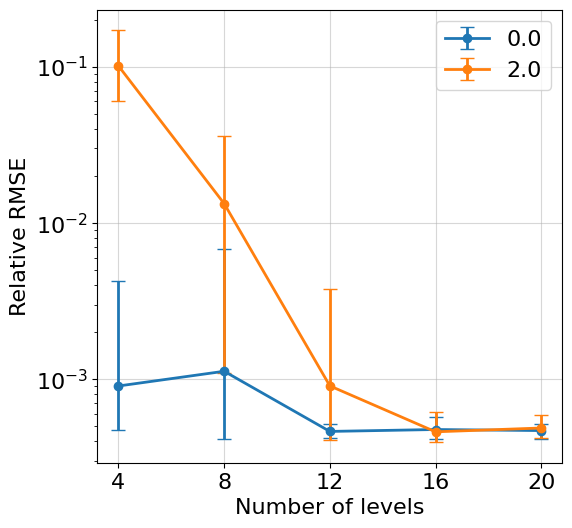

In [42]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_levels"])
    x_plot = sub_df["n_levels"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_levels"].unique())
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of levels")

    plt.grid(alpha = 0.5)

In [38]:
result_dict = get_result_table("GridMLP_decoupled_resolution_4levels",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,16.0,0.011589,25.522098,0.011341,0.011813
config_1,32.0,2.0,16.0,0.009262,33.453989,0.006914,0.012766
config_2,16.0,0.0,32.0,0.002037,25.484288,0.001880,0.002265
config_3,32.0,2.0,32.0,0.006820,33.192698,0.001501,0.038872
config_4,16.0,0.0,64.0,0.000487,28.339899,0.000421,0.000623
config_5,32.0,2.0,64.0,0.137162,36.997600,0.040980,0.291140
config_6,16.0,0.0,128.0,0.841702,31.893721,0.007787,1.887170
config_7,32.0,2.0,128.0,0.490740,40.336710,0.377875,0.595428
config_8,16.0,0.0,256.0,4.080510,40.524105,1.178661,6.788403
config_9,32.0,2.0,256.0,0.900990,49.602995,0.868722,0.940355


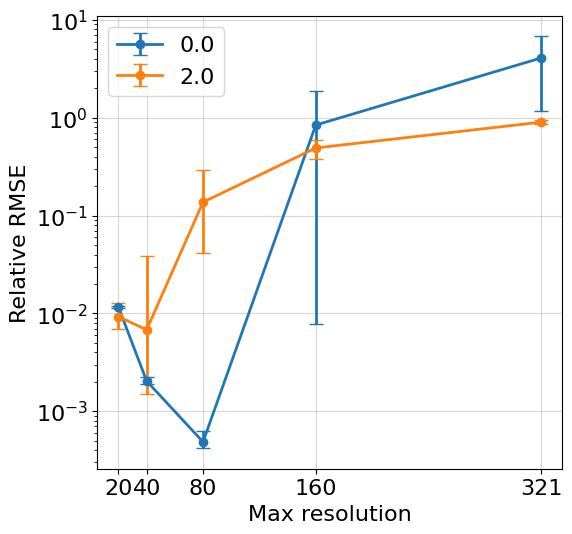

In [39]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [43]:
result_dict = get_result_table("GridMLP_decoupled_network",[["network","n_neurons"],["network","n_hidden_layers"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,error,time,error_min,error_max
config_0,16.0,0.0,0.000456,28.536396,0.000415,0.000506
config_1,16.0,1.0,0.000451,32.015877,0.000402,0.000589
config_10,64.0,2.0,0.000469,36.417198,0.000415,0.000589
config_11,64.0,3.0,0.052286,43.445004,0.004338,0.218513
config_12,128.0,0.0,0.000461,30.632246,0.000411,0.000516
config_13,128.0,1.0,0.000446,36.126750,0.000397,0.000514
config_14,128.0,2.0,0.012975,42.721493,0.000568,0.049936
config_15,128.0,3.0,0.002482,49.407199,0.000405,0.019655
config_2,16.0,2.0,0.000480,41.149582,0.000382,0.000640
config_3,16.0,3.0,0.001848,44.074953,0.000401,0.013797


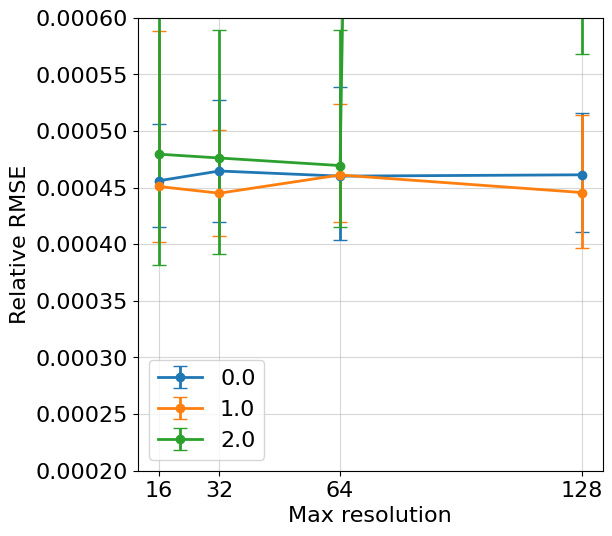

In [54]:
n_hidden_layers_list = [0.0,1.0,2.0]#result_df["n_hidden_layers"].unique()
xticks = result_df["n_neurons"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_neurons"])
    x_plot = sub_df["n_neurons"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks)
    # plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")
    plt.ylim([00.0002,0.0006])

    plt.grid(alpha = 0.5)

In [24]:
result_dict = get_result_table("GridMLP_decoupled_network_sin",[["network","n_neurons"],["network","n_hidden_layers"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,error,time,error_min,error_max
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_0,16.0,0.0,0.000631,29.486920,0.000604,0.000669
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_1,16.0,1.0,0.000472,34.325885,0.000430,0.000551
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_10,64.0,2.0,0.000478,39.079465,0.000416,0.000599
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_11,64.0,3.0,0.002299,43.577402,0.000407,0.012646
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_12,128.0,0.0,0.000593,29.109395,0.000501,0.000654
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_13,128.0,1.0,0.000521,34.474896,0.000448,0.000627
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_14,128.0,2.0,0.000477,39.076692,0.000429,0.000538
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_15,128.0,3.0,0.000549,44.998499,0.000465,0.000661
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_2,16.0,2.0,0.000459,37.117797,0.000411,0.000495
d:\Research_CAE\MyTinyCUDANN\tiny-cuda-nn\main\Multiscale\Tasks\GridMLP_decoupled_network_sin\config_3,16.0,3.0,0.005694,41.854904,0.000475,0.045427


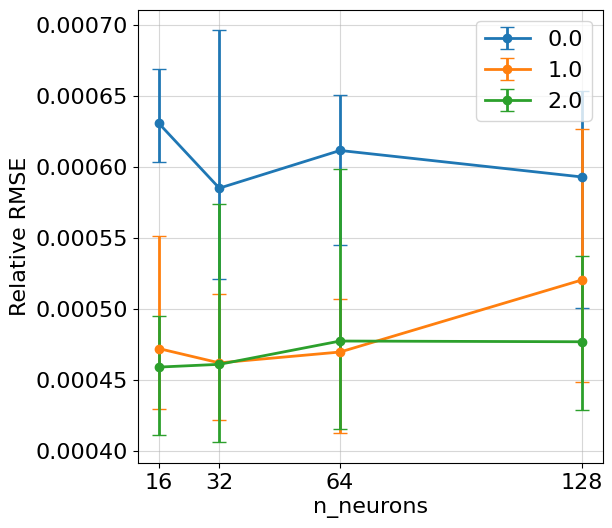

In [25]:
n_hidden_layers_list = [0.0,1.0,2.0]
# n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["n_neurons"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_neurons"])
    x_plot = sub_df["n_neurons"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks)
    # plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("n_neurons")

    plt.grid(alpha = 0.5)

In [67]:
result_dict = get_result_table("GridMLP_decoupled_levels_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","n_levels"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,n_levels,error,time,error_min,error_max
config_0,16.0,0.0,4.0,0.000661,29.919626,0.000511,0.000798
config_1,32.0,2.0,4.0,0.080519,40.052304,0.041657,0.145368
config_2,16.0,0.0,8.0,0.000654,29.330899,0.000559,0.000814
config_3,32.0,2.0,8.0,0.004563,39.054301,0.000595,0.012366
config_4,16.0,0.0,12.0,0.000619,28.940423,0.000569,0.000730
config_5,32.0,2.0,12.0,0.000477,38.505900,0.000428,0.000588
config_6,16.0,0.0,16.0,0.000590,28.596688,0.000518,0.000636
config_7,32.0,2.0,16.0,0.000449,38.072484,0.000386,0.000483
config_8,16.0,0.0,20.0,0.000600,30.155810,0.000506,0.000710
config_9,32.0,2.0,20.0,0.000477,37.928694,0.000430,0.000539


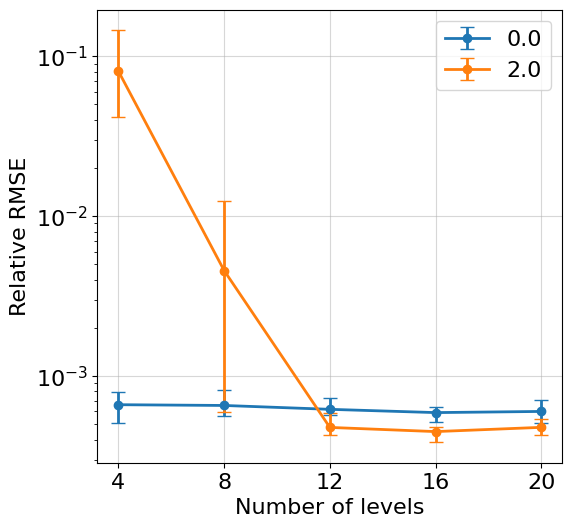

In [68]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_levels"])
    x_plot = sub_df["n_levels"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_levels"].unique())
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of levels")

    plt.grid(alpha = 0.5)

In [72]:
result_dict = get_result_table("GridMLP_decoupled_levels_F1_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","n_levels"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,n_levels,error,time,error_min,error_max
config_0,16.0,0.0,4.0,0.000636,25.671024,0.000493,0.000865
config_1,32.0,2.0,4.0,0.155207,33.781812,0.054554,0.333266
config_2,16.0,0.0,8.0,0.000586,25.745347,0.000534,0.000740
config_3,32.0,2.0,8.0,0.038551,34.153696,0.004787,0.080190
config_4,16.0,0.0,12.0,0.000586,25.338502,0.000518,0.000804
config_5,32.0,2.0,12.0,0.003145,33.680408,0.000456,0.011063
config_6,16.0,0.0,16.0,0.000573,26.071195,0.000470,0.000665
config_7,32.0,2.0,16.0,0.000541,35.194292,0.000409,0.001007
config_8,16.0,0.0,20.0,0.000555,26.073724,0.000504,0.000645
config_9,32.0,2.0,20.0,0.000492,33.803036,0.000431,0.000597


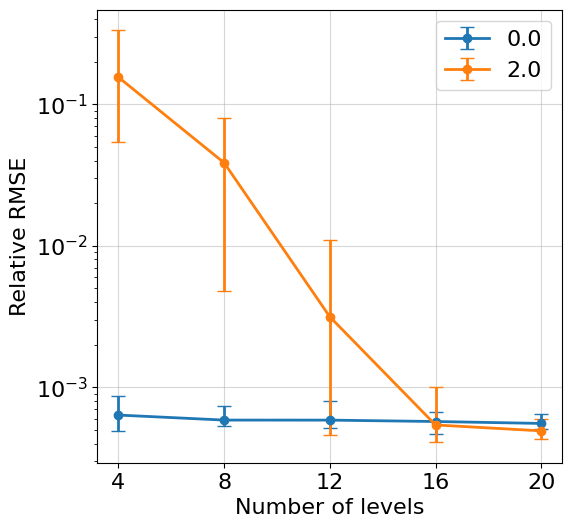

In [73]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_levels"])
    x_plot = sub_df["n_levels"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_levels"].unique())
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of levels")

    plt.grid(alpha = 0.5)

In [74]:
result_dict = get_result_table("GridMLP_decoupled_levels_F4_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","n_levels"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,n_levels,error,time,error_min,error_max
config_0,16.0,0.0,4.0,0.000684,28.456837,0.000563,0.000771
config_1,32.0,2.0,4.0,0.025496,37.415581,0.015149,0.042287
config_2,16.0,0.0,8.0,0.000705,29.058983,0.000626,0.000845
config_3,32.0,2.0,8.0,0.000473,38.412491,0.000430,0.000547
config_4,16.0,0.0,12.0,0.000661,28.720395,0.000579,0.000740
config_5,32.0,2.0,12.0,0.000512,38.559396,0.000408,0.000710
config_6,16.0,0.0,16.0,0.000610,32.171501,0.000530,0.000658
config_7,32.0,2.0,16.0,0.000469,40.641995,0.000417,0.000513
config_8,16.0,0.0,20.0,0.000645,35.990864,0.000588,0.000699
config_9,32.0,2.0,20.0,0.000462,43.814451,0.000424,0.000518


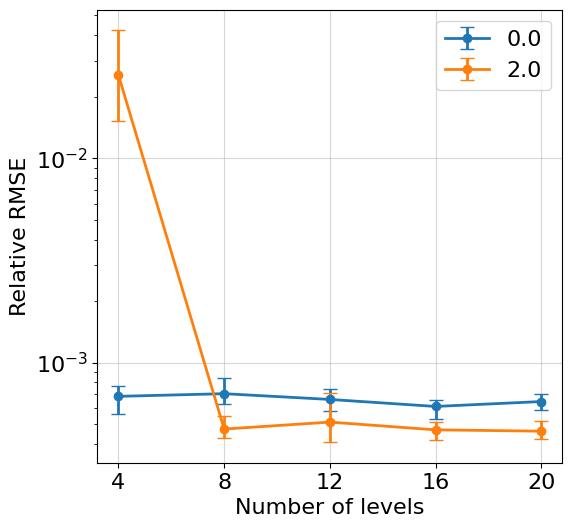

In [75]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["n_levels"])
    x_plot = sub_df["n_levels"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(result_df["n_levels"].unique())
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Number of levels")

    plt.grid(alpha = 0.5)

In [70]:
result_dict = get_result_table("GridMLP_decoupled_resolution_12levels_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,7.0,0.008779,27.301749,0.008624,0.009041
config_1,32.0,2.0,7.0,0.008698,33.862293,0.008527,0.008897
config_2,16.0,0.0,13.0,0.001615,25.037700,0.001459,0.001772
config_3,32.0,2.0,13.0,0.001600,34.244573,0.001429,0.001802
config_4,16.0,0.0,26.0,0.000631,28.984252,0.000560,0.000699
config_5,32.0,2.0,26.0,0.000449,39.183504,0.000403,0.000499
config_6,16.0,0.0,52.0,0.001110,34.286208,0.000848,0.001552
config_7,32.0,2.0,52.0,0.042508,44.227786,0.018814,0.078064
config_8,16.0,0.0,103.0,0.497607,46.533402,0.307060,0.627594
config_9,32.0,2.0,103.0,0.530987,56.073399,0.447039,0.673257


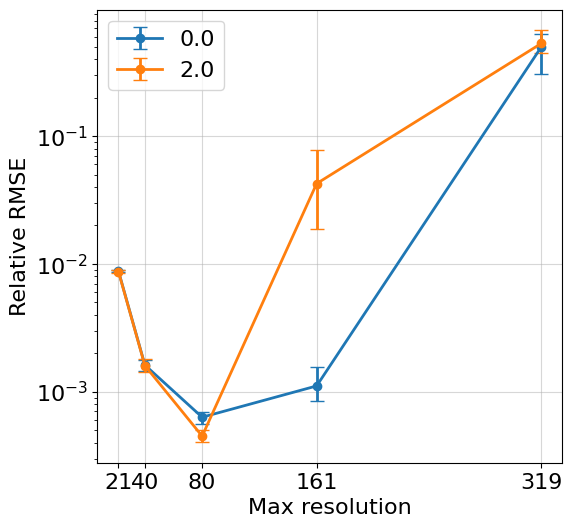

In [71]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(12-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [76]:
result_dict = get_result_table("GridMLP_decoupled_resolution_12levels_F4_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,7.0,0.008677,31.058506,0.008523,0.008886
config_1,32.0,2.0,7.0,0.008703,38.944495,0.008416,0.008947
config_2,16.0,0.0,13.0,0.001726,28.274298,0.001509,0.002029
config_3,32.0,2.0,13.0,0.001600,35.451096,0.001461,0.001683
config_4,16.0,0.0,26.0,0.000684,31.223604,0.000625,0.000761
config_5,32.0,2.0,26.0,0.000454,43.400154,0.000424,0.000499
config_6,16.0,0.0,52.0,0.001151,39.826173,0.000953,0.001524
config_7,32.0,2.0,52.0,0.012008,49.987553,0.004724,0.025010
config_8,16.0,0.0,103.0,0.501428,68.557626,0.435556,0.599349
config_9,32.0,2.0,103.0,0.502408,78.281090,0.377764,0.588307


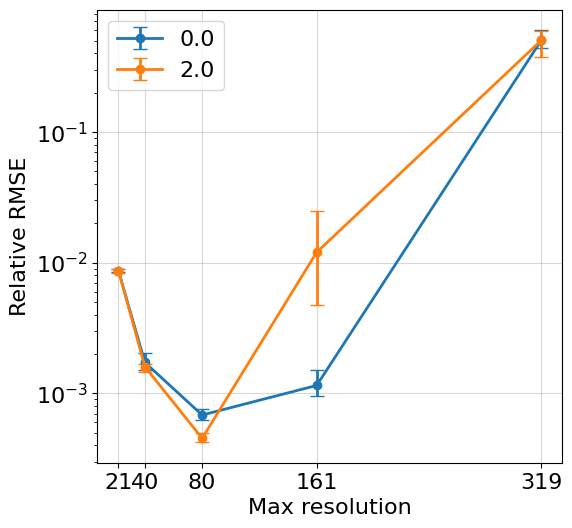

In [77]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(12-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [78]:
result_dict = get_result_table("GridMLP_decoupled_resolution_12levels_F1_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,7.0,0.008767,25.092503,0.008654,0.008863
config_1,32.0,2.0,7.0,0.008846,34.030093,0.008145,0.010250
config_2,16.0,0.0,13.0,0.001595,25.377298,0.001524,0.001727
config_3,32.0,2.0,13.0,0.001625,34.278995,0.001517,0.001762
config_4,16.0,0.0,26.0,0.000574,28.436596,0.000497,0.000632
config_5,32.0,2.0,26.0,0.002301,38.078998,0.000474,0.006060
config_6,16.0,0.0,52.0,0.001469,30.649095,0.000723,0.003033
config_7,32.0,2.0,52.0,0.076341,40.494199,0.031748,0.118255
config_8,16.0,0.0,103.0,0.469446,37.257807,0.281702,0.602959
config_9,32.0,2.0,103.0,0.557383,47.371209,0.429428,0.646561


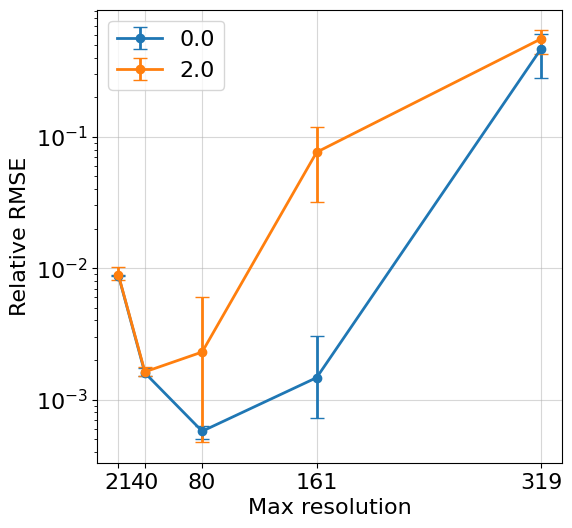

In [80]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(12-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [81]:
result_dict = get_result_table("GridMLP_decoupled_resolution_12levels_9e4_sin",[["network","n_neurons"],["network","n_hidden_layers"],["encoding","base_resolution"]])
result_df = pd.DataFrame(result_dict).T
result_df

,n_neurons,n_hidden_layers,base_resolution,error,time,error_min,error_max
config_0,16.0,0.0,7.0,0.008686,54.939653,0.008541,0.008840
config_1,32.0,2.0,7.0,0.008636,69.186583,0.008046,0.008776
config_2,16.0,0.0,13.0,0.001601,43.502987,0.001533,0.001734
config_3,32.0,2.0,13.0,0.001532,54.724084,0.001286,0.001672
config_4,16.0,0.0,26.0,0.000551,34.445198,0.000454,0.000665
config_5,32.0,2.0,26.0,0.000336,46.223773,0.000300,0.000381
config_6,16.0,0.0,52.0,0.000918,33.385295,0.000615,0.001452
config_7,32.0,2.0,52.0,0.005486,44.261065,0.001754,0.012925
config_8,16.0,0.0,103.0,0.179017,42.840207,0.086563,0.258351
config_9,32.0,2.0,103.0,0.276020,52.934906,0.194907,0.379401


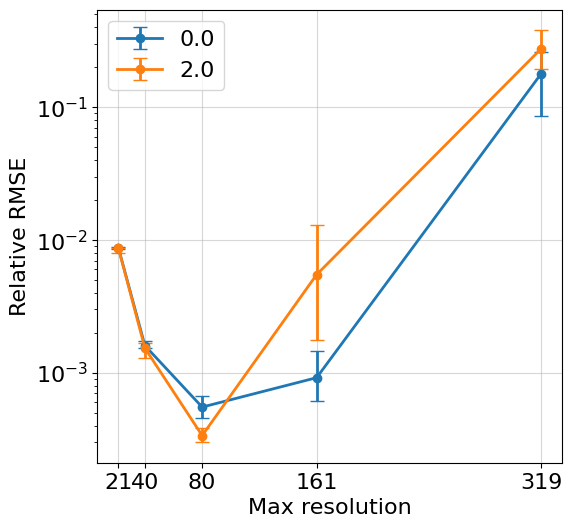

In [82]:
n_hidden_layers_list = result_df["n_hidden_layers"].unique()
xticks = result_df["base_resolution"].unique()
i=0
plt.figure(figsize=(6,6))
for n_hidden_layers in n_hidden_layers_list:
    sub_df = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    sort_idx = np.argsort(sub_df["base_resolution"])
    x_plot = sub_df["base_resolution"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=n_hidden_layers)
    plt.legend()
    plt.xticks(xticks,(xticks*1.12**(12-2)).astype(int))
    plt.yscale("log")
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)

In [39]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_resolution_levels_sin_3e3",
    "GridMLP_decoupled_resolution_levels_sin",
    "GridMLP_decoupled_resolution_levels_sin_3e5",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],
    ["training","interior_batch"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df

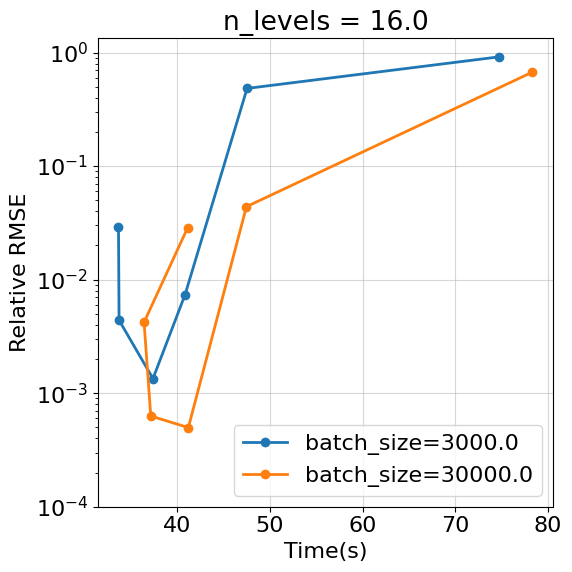

In [37]:
# n_level_list = np.sort(all_df["n_levels"].unique())
batch_size_list = np.sort(all_df["interior_batch"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
n_levels = 16.0
result_df = result_df[result_df["n_levels"] == n_levels]
i=0
plt.figure(figsize=(6,6))
for batch_size in batch_size_list:
    if batch_size == 3e5:
        continue
    sub_df = result_df[result_df["interior_batch"] == batch_size]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    # x_plot = base_resolution*1.12**(n_levels-1)
    x_plot = sub_df["time"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    # y1_plot = sub_df["error_min"][sort_idx]
    # y2_plot = sub_df["error_max"][sort_idx]
    # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="batch_size={}".format(batch_size))
    plt.plot(x_plot,y_plot,marker="o",label="batch_size={}".format(batch_size))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.xlabel("Time(s)")
    plt.ylabel("Relative RMSE")

    plt.grid(alpha = 0.5)
    # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.title("n_levels = {}".format(n_levels))
    plt.tight_layout()

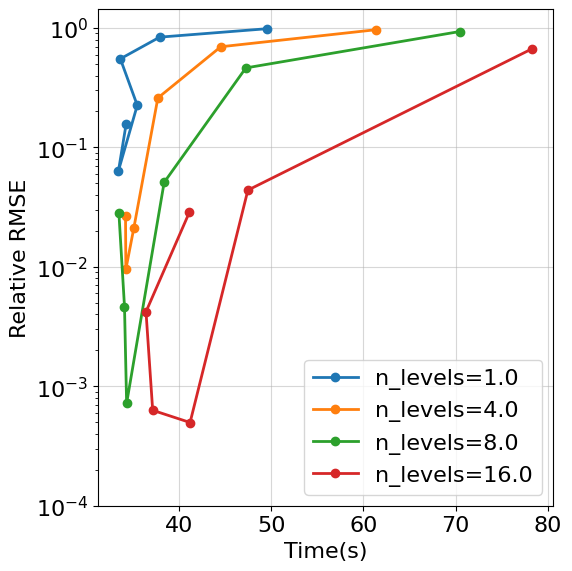

In [38]:
n_level_list = np.sort(all_df["n_levels"].unique())
# batch_size_list = np.sort(all_df["interior_batch"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
batch_size = 3e4
result_df = result_df[result_df["interior_batch"] == batch_size]
i=0
plt.figure(figsize=(6,6))
for n_level in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_level]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    # x_plot = base_resolution*1.12**(n_levels-1)
    x_plot = sub_df["time"][sort_idx]
    y_plot = sub_df["error"][sort_idx]
    # y1_plot = sub_df["error_min"][sort_idx]
    # y2_plot = sub_df["error_max"][sort_idx]
    # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="batch_size={}".format(batch_size))
    plt.plot(x_plot,y_plot,marker="o",label="n_levels={}".format(n_level))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.xlabel("Time(s)")
    plt.ylabel("Relative RMSE")

    plt.grid(alpha = 0.5)
    # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    # plt.title("n_levels = {}".format(n_levels))
    plt.tight_layout()

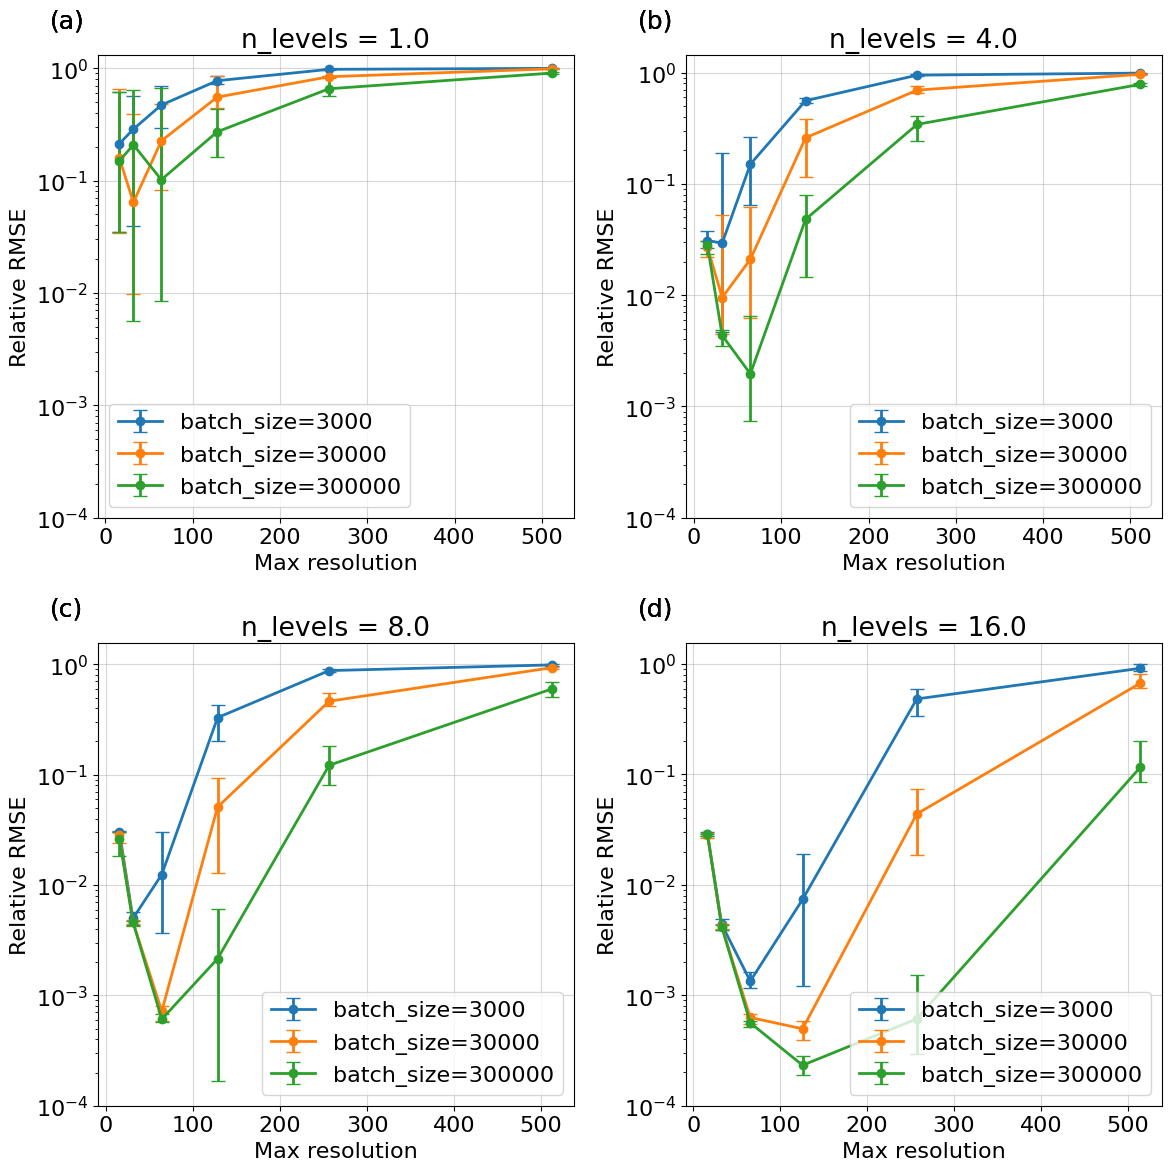

In [42]:
# n_level_list = np.sort(all_df["n_levels"].unique())
batch_size_list = np.sort(all_df["interior_batch"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]


i=0
plt.figure(figsize=(12,12))
for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_n_levels = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for batch_size in batch_size_list:
        sub_df = result_df_n_levels[result_df_n_levels["interior_batch"] == batch_size]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="batch_size={}".format(int(batch_size)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_levels_batch.png"), dpi=300)

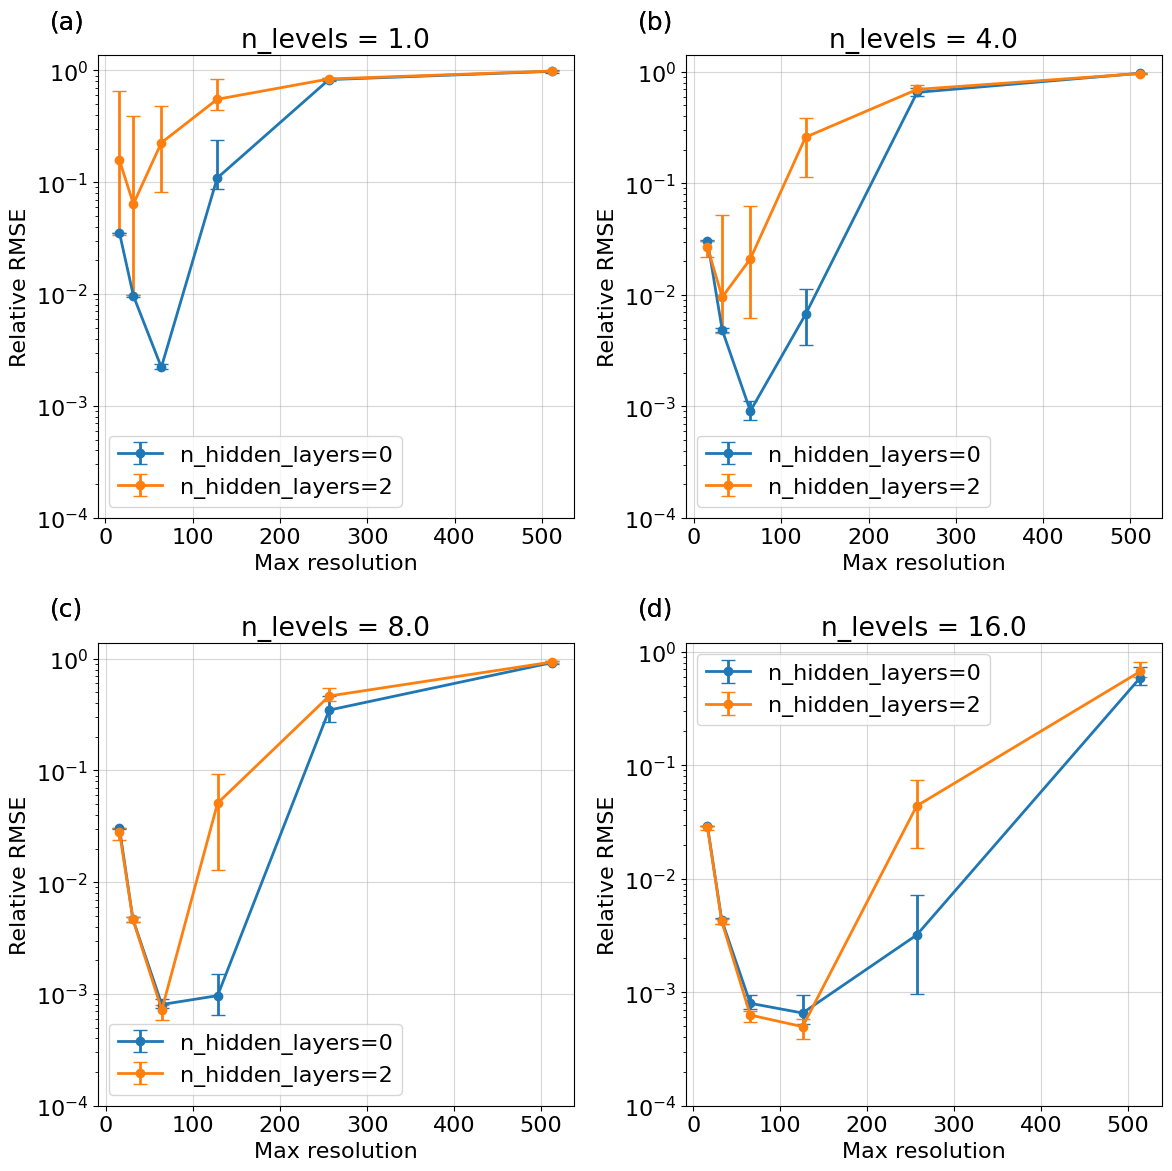

In [65]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["interior_batch"] == 30000]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

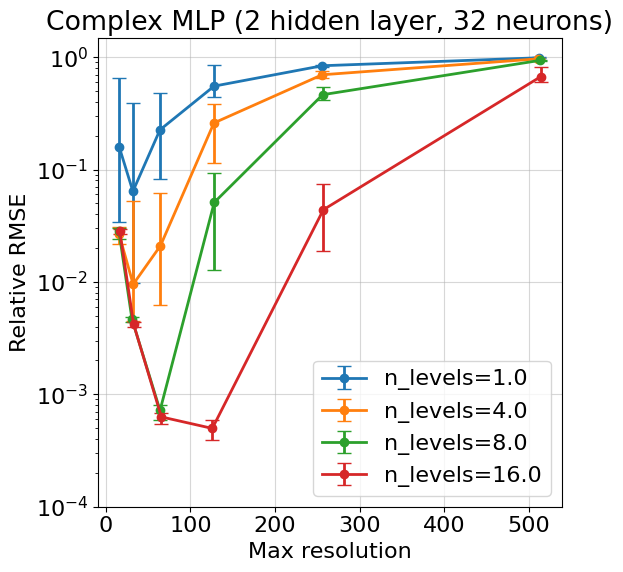

In [9]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Complex MLP (2 hidden layer, 32 neurons)")
    plt.tight_layout()

In [11]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_resolution_levels_sin_3e5",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])

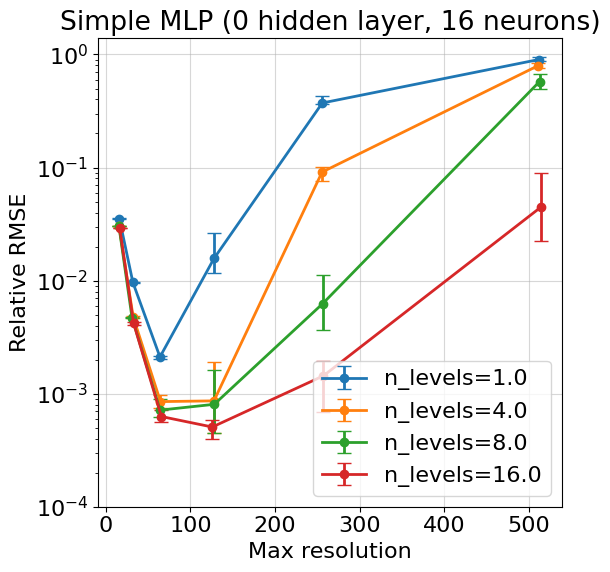

In [12]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 0.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.tight_layout()

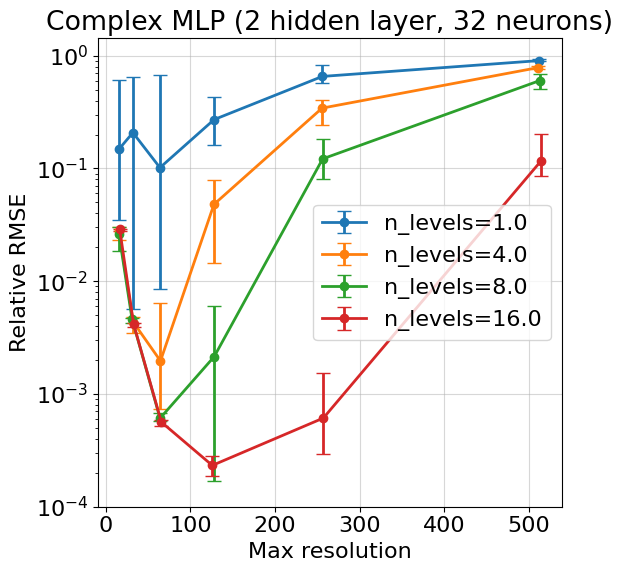

In [13]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Complex MLP (2 hidden layer, 32 neurons)")
    plt.tight_layout()

In [4]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_resolution_levels_sin_3e3",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])

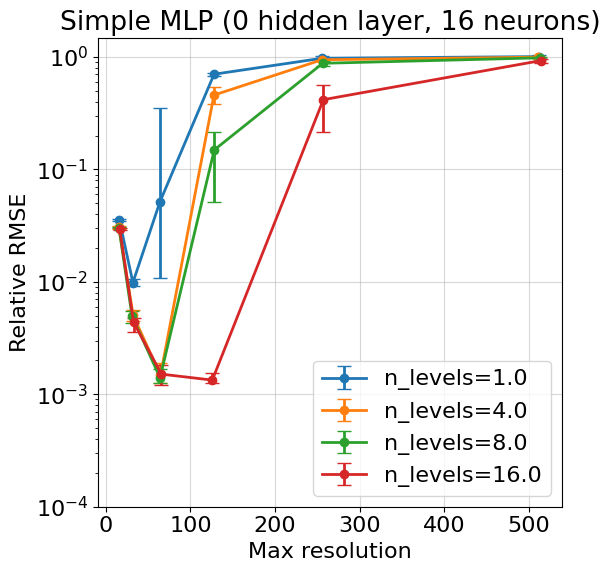

In [8]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 0.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Simple MLP (0 hidden layer, 16 neurons)")
    plt.tight_layout()

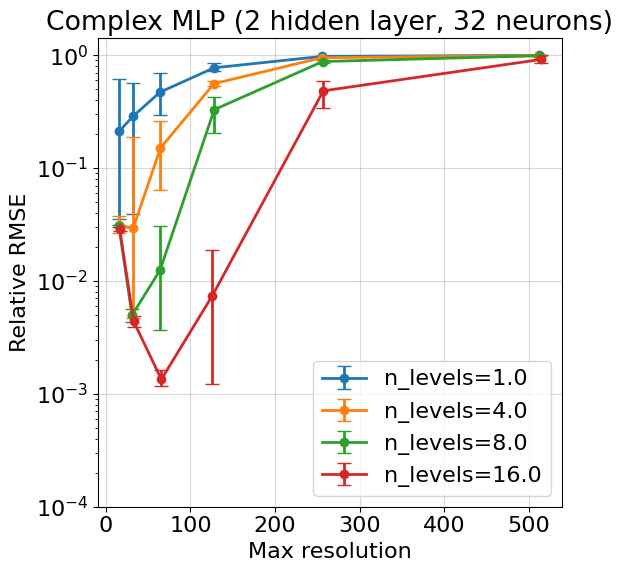

In [9]:
n_level_list = np.sort(all_df["n_levels"].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 2.0]
i=0
plt.figure(figsize=(6,6))
for n_levels in n_level_list:
    sub_df = result_df[result_df["n_levels"] == n_levels]
    sort_idx = np.argsort(sub_df["base_resolution"])
    base_resolution = sub_df["base_resolution"][sort_idx]
    x_plot = base_resolution*1.12**(n_levels-1)
    y_plot = sub_df["error"][sort_idx]
    y1_plot = sub_df["error_min"][sort_idx]
    y2_plot = sub_df["error_max"][sort_idx]
    y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
    plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="n_levels={}".format(n_levels))
    plt.legend()
    # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
    plt.yscale("log")
    plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
    plt.ylabel("Relative RMSE")
    plt.xlabel("Max resolution")

    plt.grid(alpha = 0.5)
    plt.title("Complex MLP (2 hidden layer, 32 neurons)")
    plt.tight_layout()

In [51]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_network_sin",
    "GridMLP_decoupled_network_sin_spectral0",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["network","spectral_norm"],
]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
# all_df

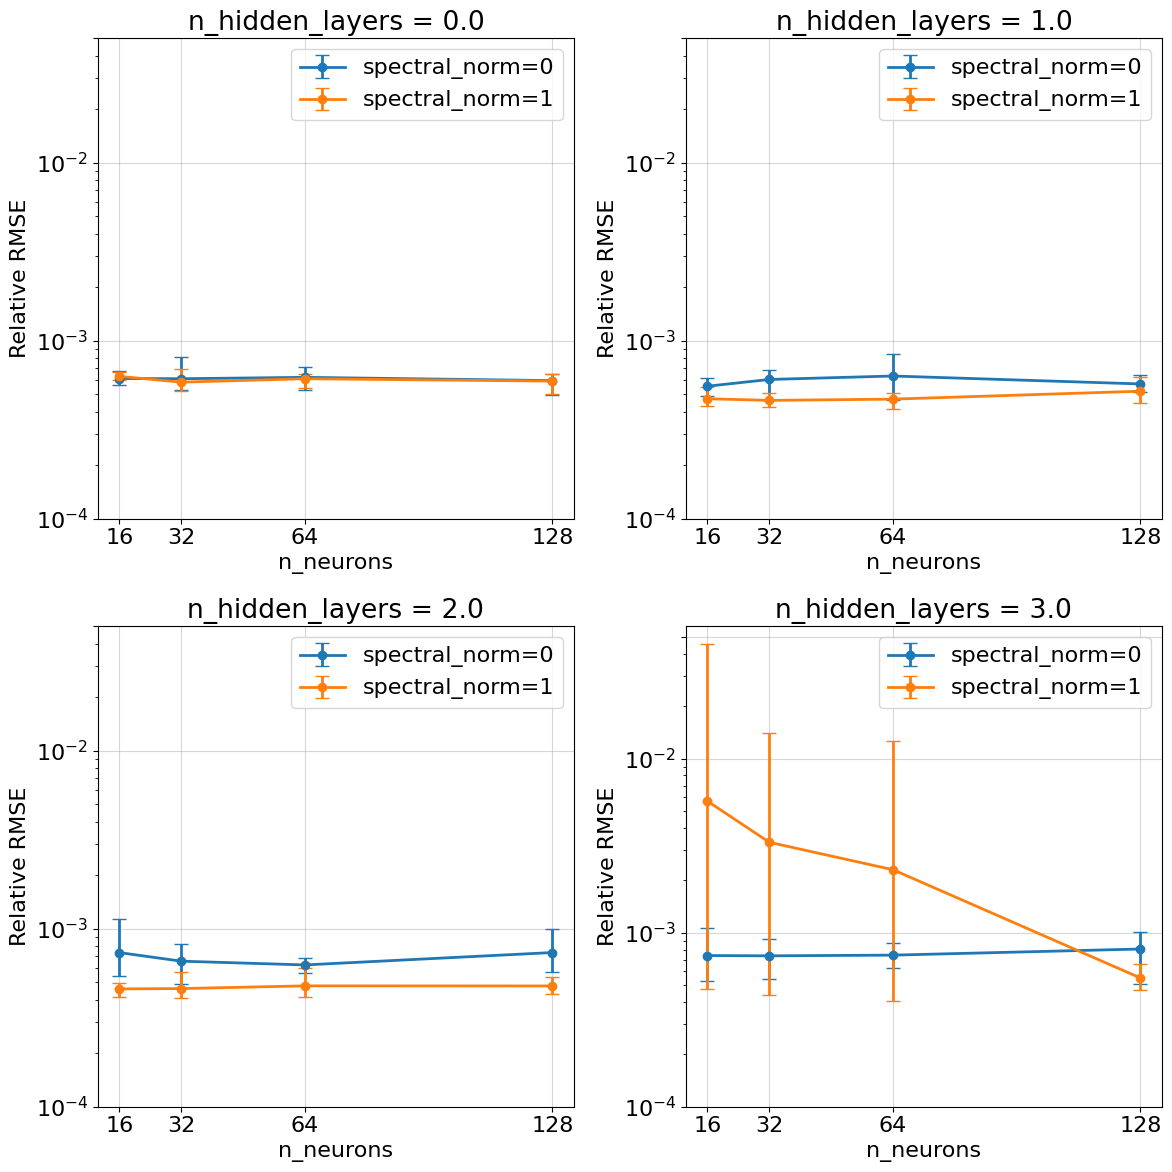

In [59]:
spectral_norm_list = np.sort(all_df["spectral_norm"].unique())
result_df = all_df
i=0
plt.figure(figsize=(12,12))
for n_hidden_layers in np.sort(all_df["n_hidden_layers"].unique()):
    i = i + 1
    result_df_n_hidden_layers = result_df[result_df["n_hidden_layers"] == n_hidden_layers]
    plt.subplot(2,2,i)
    for spectral_norm in spectral_norm_list:
        sub_df = result_df_n_hidden_layers[result_df_n_hidden_layers["spectral_norm"] == spectral_norm]
        sort_idx = np.argsort(sub_df["n_neurons"])
        n_neurons = sub_df["n_neurons"][sort_idx]
        x_plot = n_neurons
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label="spectral_norm={}".format(int(spectral_norm)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([5e-2,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("n_neurons")
        plt.xticks(np.sort(all_df["n_neurons"].unique()))
        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_hidden_layers = {}".format(n_hidden_layers))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_levels_batch.png"), dpi=300)

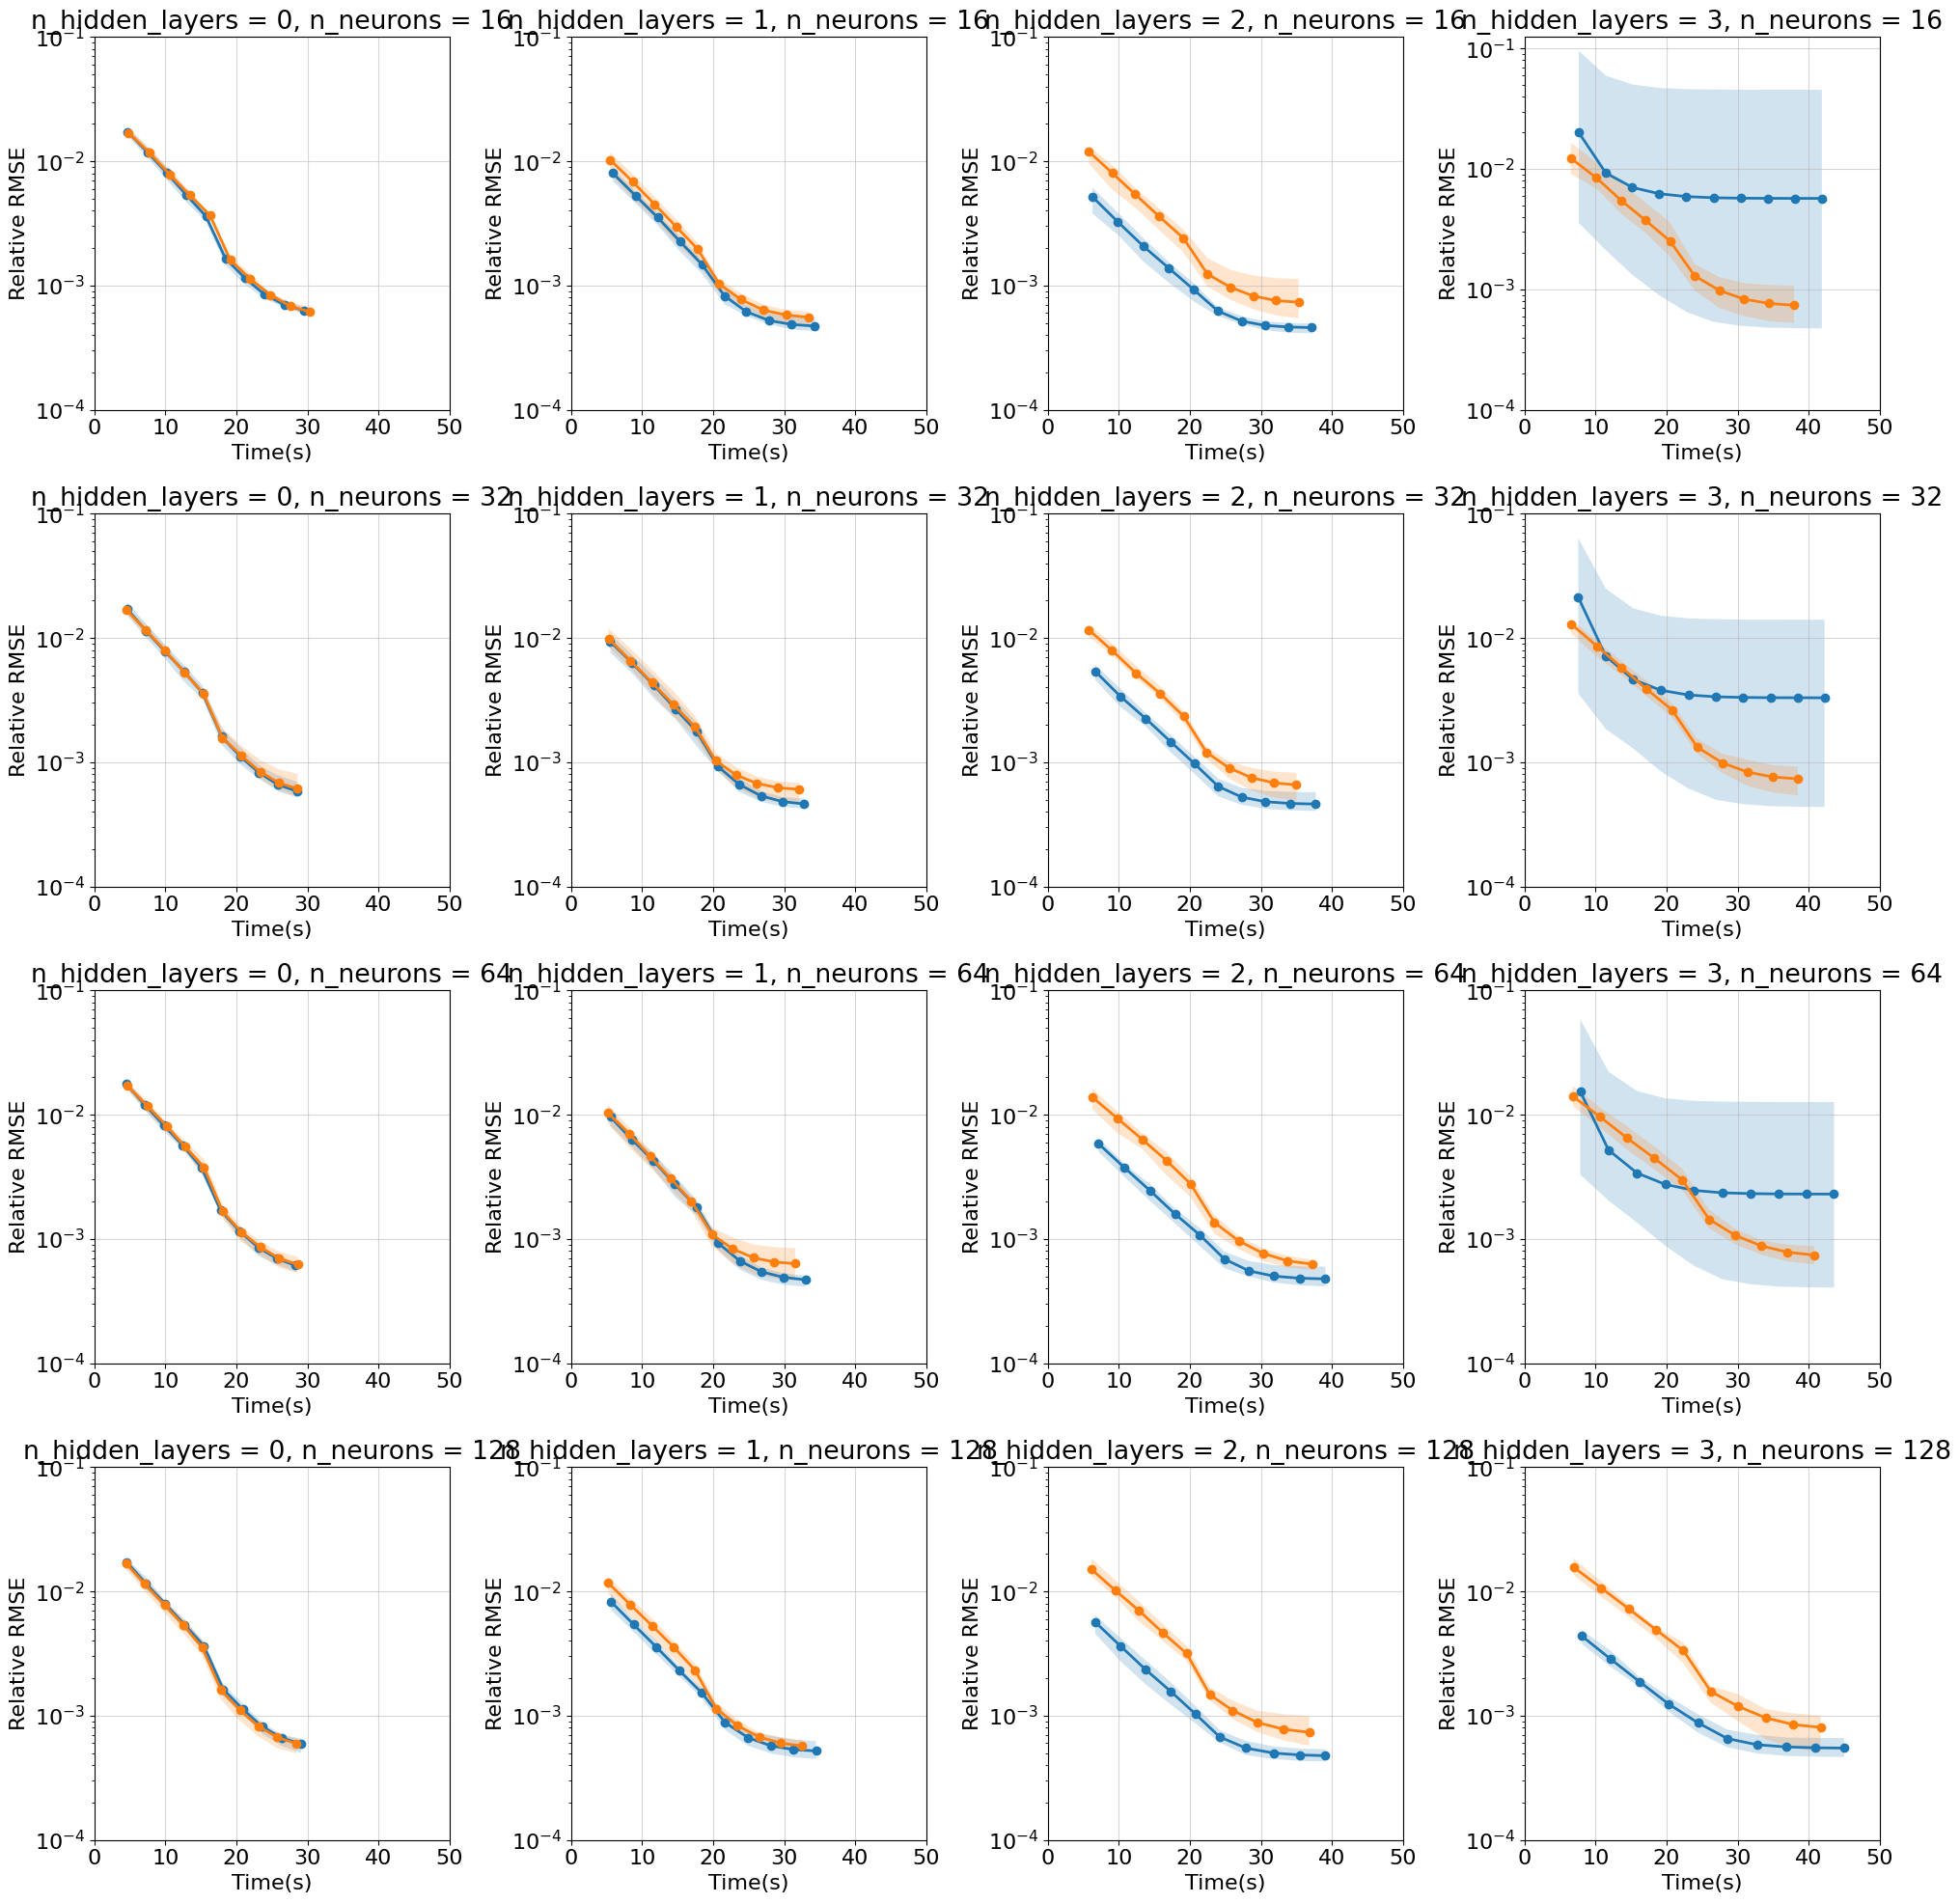

In [34]:
fig = plt.figure(figsize=(20,20))
for config_i in range(16):
    loss_name_list = [
    "GridMLP_decoupled_network_sin/config_{}".format(config_i),
    "GridMLP_decoupled_network_sin_spectral0/config_{}".format(config_i),
    ]

    label_list = [
    "With spectral normalization",
    "Without spectral normalization"
    ]

    for loss_name in loss_name_list:
        task_name,dir_name = loss_name.split("/")
        loss_dict,config = get_loss_curve(task_name,dir_name,output_config=True)
        result_dict[loss_name] = loss_dict
    n_hidden_layers = config["network"]["n_hidden_layers"]
    n_neurons = config["network"]["n_neurons"]

    plt.subplot(4,4,config_i+1)
    i = 0
    for loss_name in loss_name_list:
        plt.plot(result_dict[loss_name]["x"],result_dict[loss_name]["y"] ,marker="o",label=label_list[i])
        plt.fill_between(result_dict[loss_name]["x"], result_dict[loss_name]["y1"], result_dict[loss_name]["y2"], alpha=0.2)
        i += 1
    plt.xlabel("Time(s)")
    plt.ylabel("Relative RMSE")
    plt.yscale("log")
    plt.yticks([1e-1,1e-2,1e-3,1e-4])
    plt.xlim([0,50])
    # plt.xscale("log")
    plt.grid(alpha = 0.5)
    plt.title("n_hidden_layers = {}, n_neurons = {}".format(n_hidden_layers,n_neurons))
    # plt.legend(fontsize=14)
    fig.tight_layout()
# plt.savefig(os.path.join(figure_path,"training_loss.png"), dpi=300)
plt.show()

In [66]:
all_df = pd.DataFrame()
task_list = [
    "GridMLP_decoupled_network_sin_resolution",
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["network","spectral_norm"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])

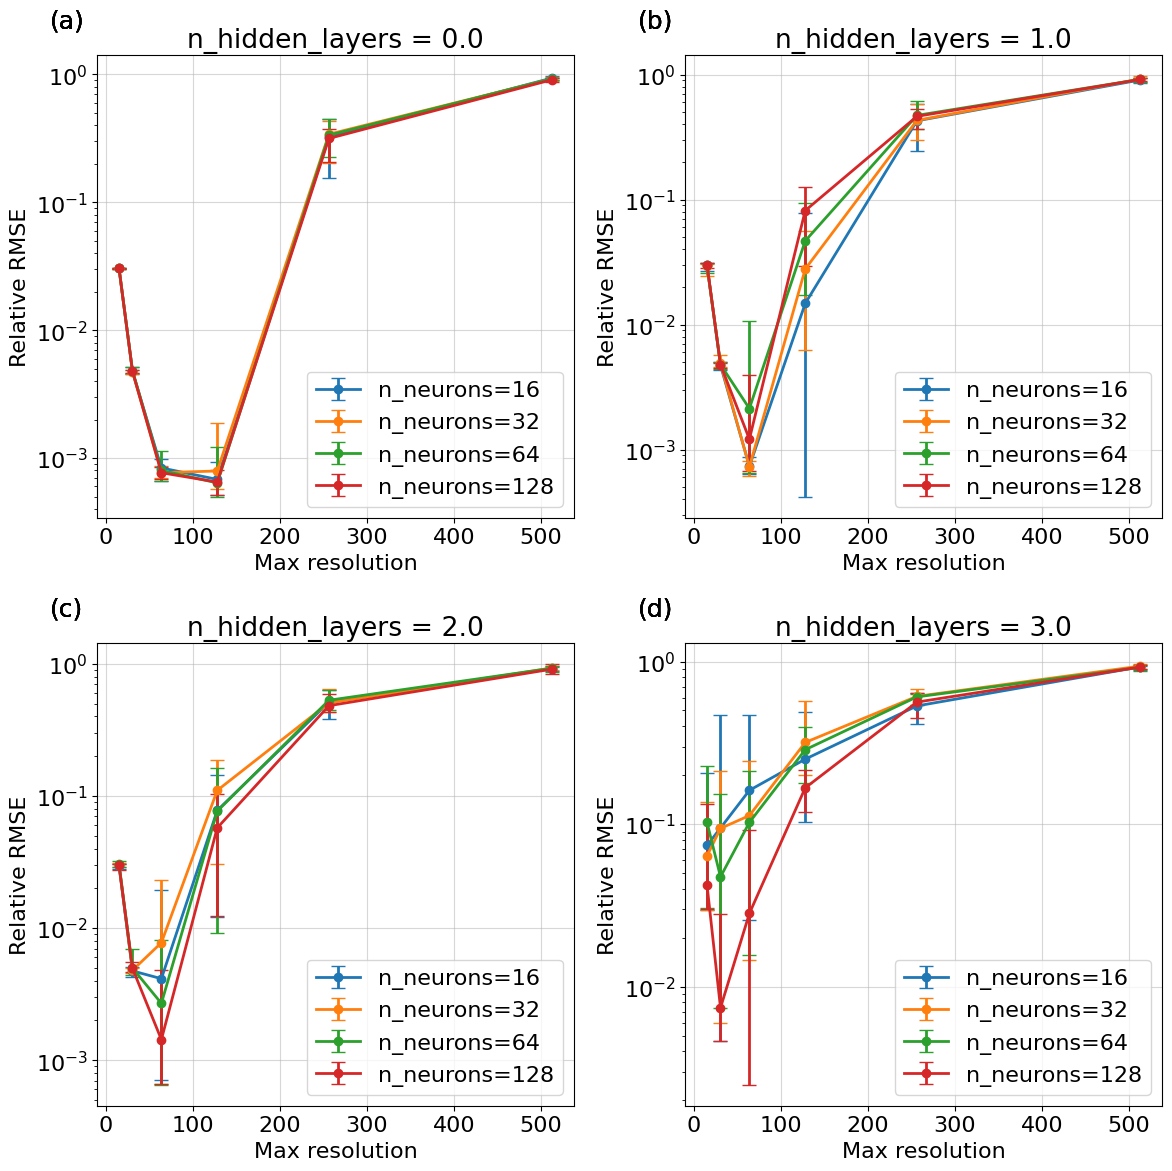

In [67]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_neurons"
plot_name = "n_hidden_layers"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["spectral_norm"] == 1]
n_levels = 8

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

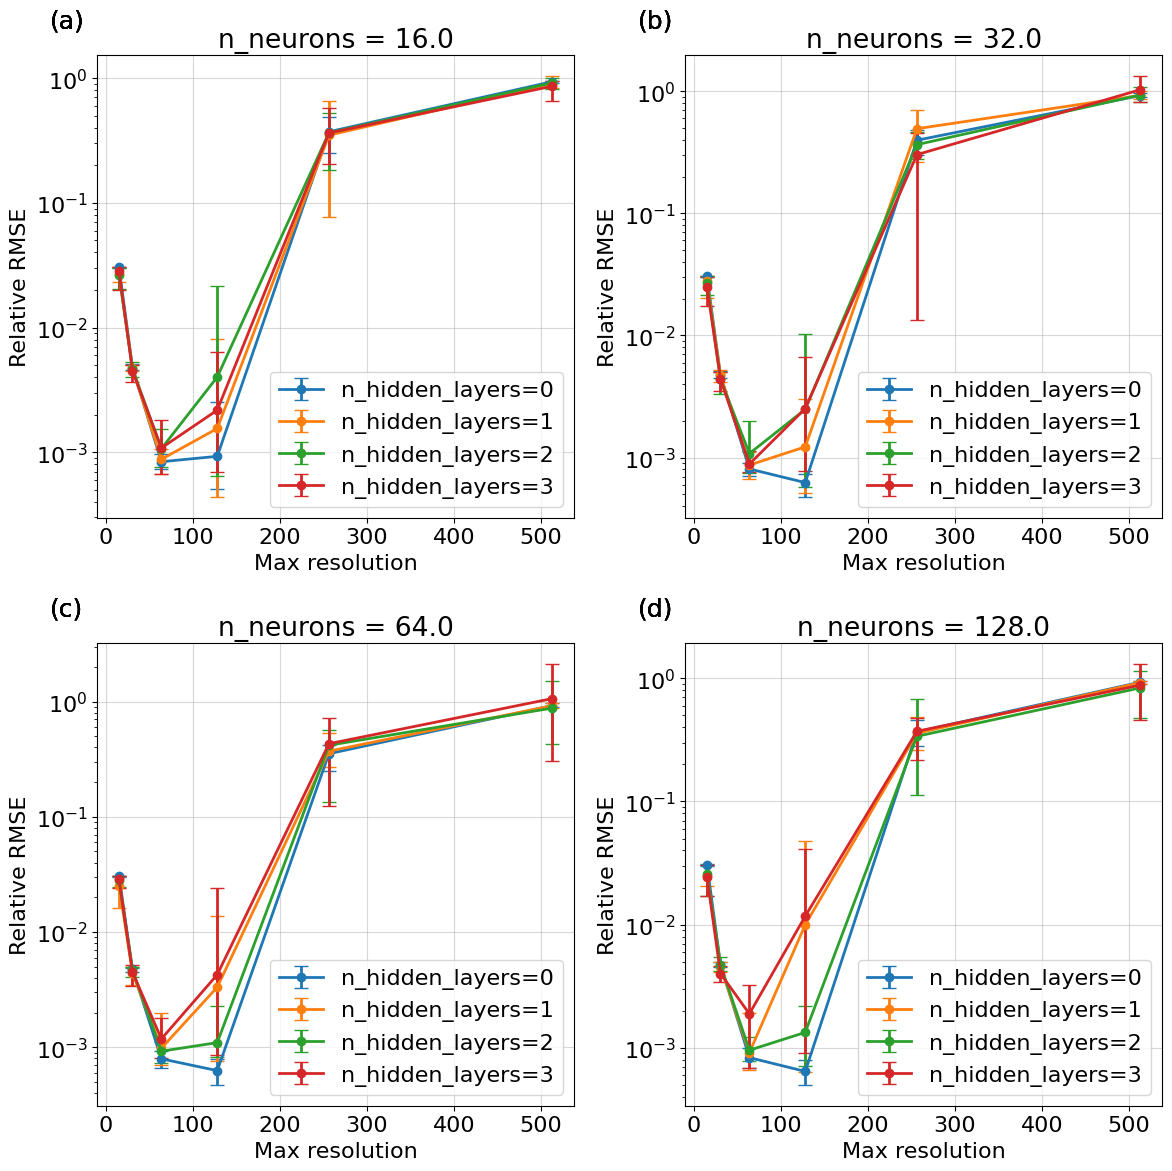

In [72]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
plot_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["spectral_norm"] == 0]
n_levels = 8

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

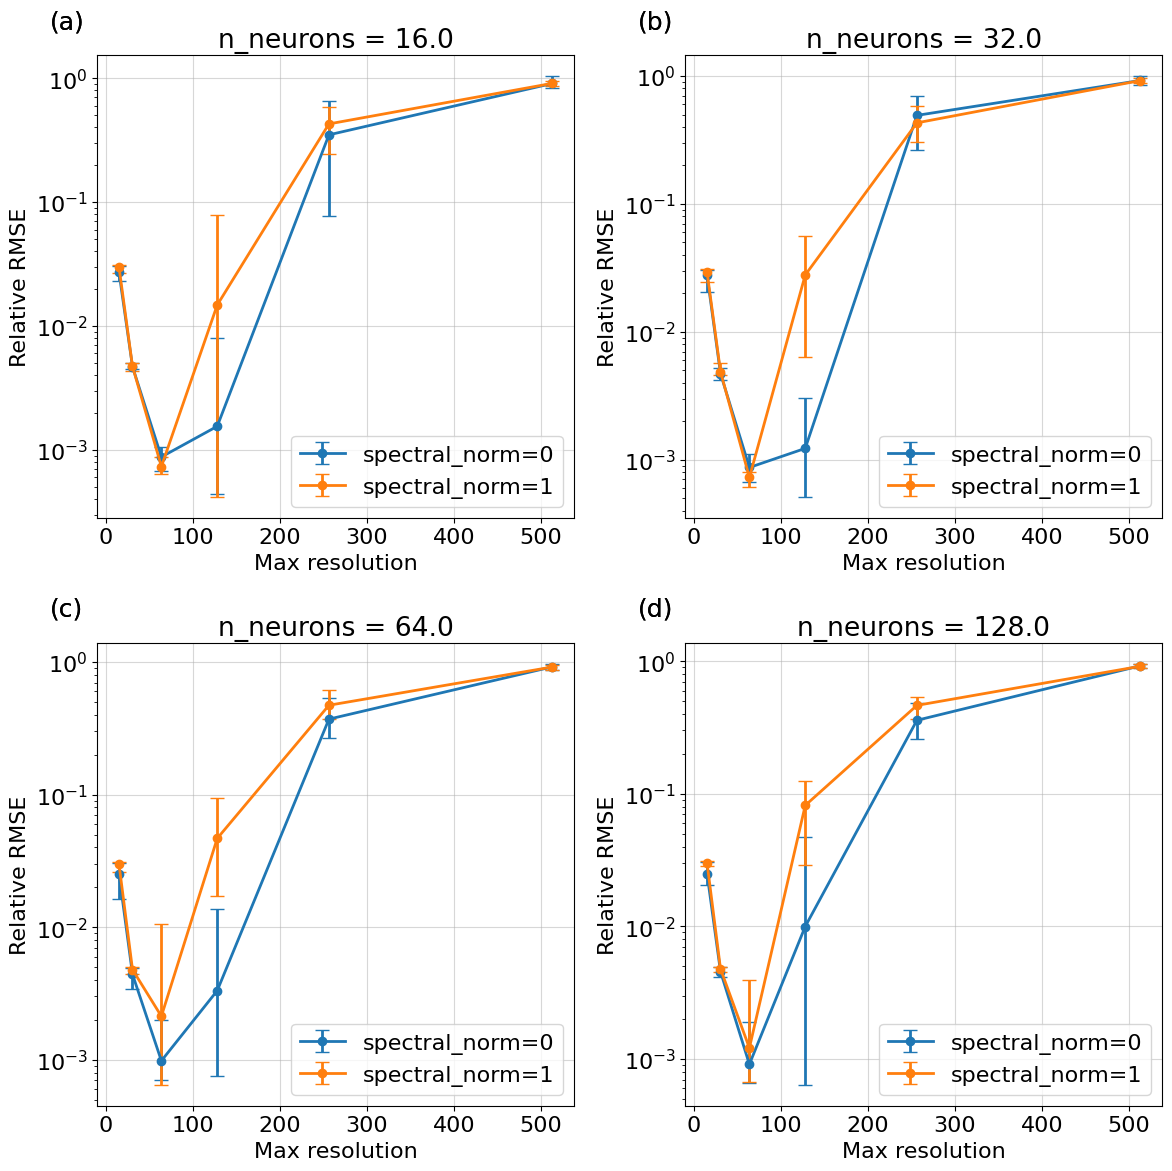

In [71]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "spectral_norm"
plot_name = "n_neurons"
label_list = np.sort(all_df[label_name].unique())
# xticks = all_df["base_resolution"].unique()
result_df = all_df[all_df["n_hidden_layers"] == 1]
n_levels = 8

i=0
plt.figure(figsize=(12,12))

for plot_name_value in np.sort(all_df[plot_name].unique()):
    i = i + 1
    result_df_plots = result_df[result_df[plot_name] == plot_name_value]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx]
        y1_plot = sub_df["error_min"][sort_idx]
        y2_plot = sub_df["error_max"][sort_idx]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title(plot_name + " = {}".format(plot_name_value))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_share_resolution_levels_batch.png"), dpi=300)

In [13]:
all_df = pd.DataFrame()
task_list = [
"GridMLP_decoupled_resolution_levels_sin",
"GridMLP_decoupled_resolution_levels_sin_network_3e4"
]
param_list = [
    ["network","n_neurons"],
    ["network","n_hidden_layers"],
    ["encoding","base_resolution"],
    ["encoding","n_levels"],
    ["training","interior_batch"]]
for task_name in task_list:
    result_dict = get_result_table(task_name,param_list,main_path=main_path)
    result_df = pd.DataFrame(result_dict).T
    all_df = pd.concat([all_df,result_df])
all_df = all_df[all_df["interior_batch"] == 3e4]

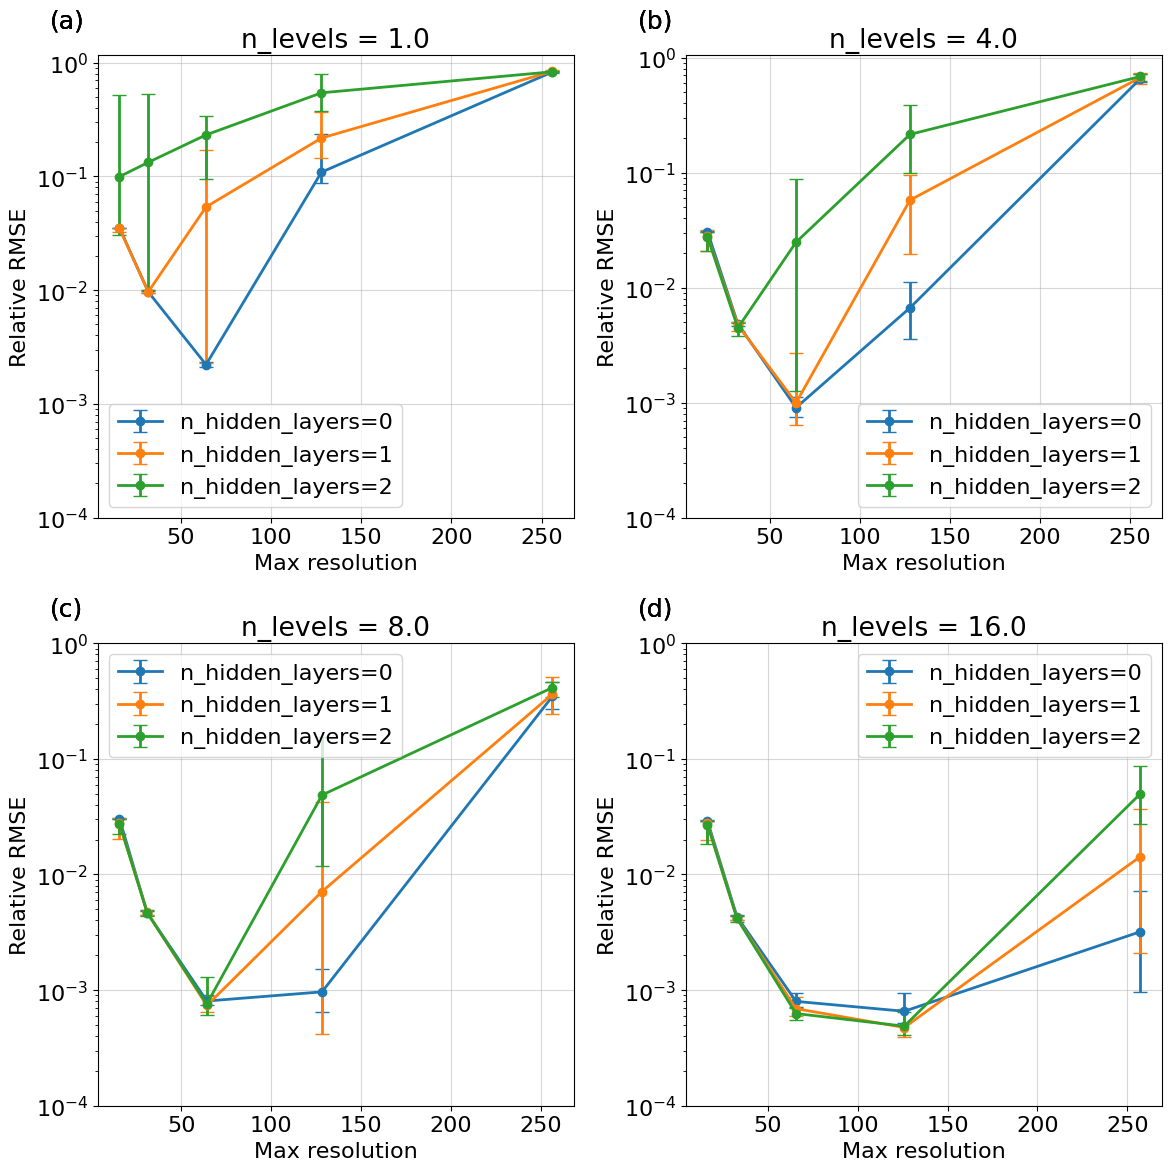

In [22]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
filter_name = "n_neurons"
filter_value = 16
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["error"][sort_idx][x_plot<500]
        y1_plot = sub_df["error_min"][sort_idx][x_plot<500]
        y2_plot = sub_df["error_max"][sort_idx][x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        plt.yscale("log")
        plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Relative RMSE")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_level_{}_{}={}.png".format(label_name,filter_name,filter_value)), dpi=300)

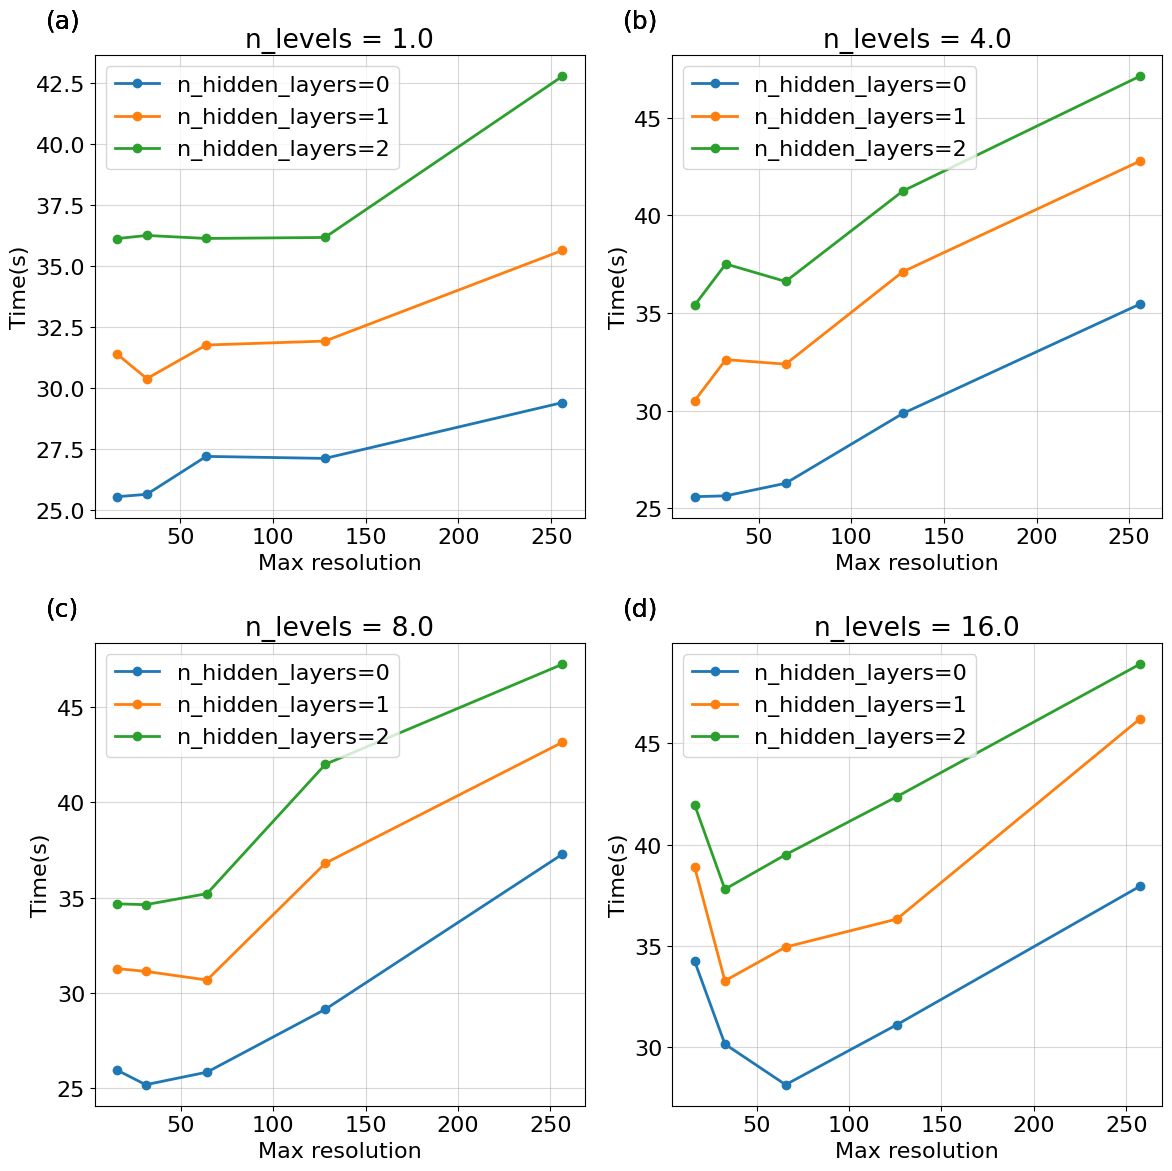

In [23]:
# n_level_list = np.sort(all_df["n_levels"].unique())
label_name = "n_hidden_layers"
filter_name = "n_neurons"
filter_value = 16
label_list = np.sort(all_df[label_name].unique())
result_df = all_df[all_df[filter_name] == filter_value]


i=0
plt.figure(figsize=(12,12))

for n_levels in np.sort(all_df["n_levels"].unique()):
    i = i + 1
    result_df_plots = result_df[result_df["n_levels"] == n_levels]
    plt.subplot(2,2,i)
    for label in label_list:
        sub_df = result_df_plots[result_df_plots[label_name] == label]
        sort_idx = np.argsort(sub_df["base_resolution"])
        base_resolution = sub_df["base_resolution"][sort_idx]
        x_plot = base_resolution*1.12**(n_levels-1)
        y_plot = sub_df["time"][sort_idx][x_plot<500]
        # y1_plot = sub_df["error_min"][sort_idx][x_plot<500]
        # y2_plot = sub_df["error_max"][sort_idx][x_plot<500]
        
        x_plot = x_plot[x_plot<500]
        # y_err_plot = np.vstack([y_plot-y1_plot,y2_plot-y_plot])
        # plt.errorbar(x_plot,y_plot,yerr=y_err_plot,marker="o",capsize=5,label=label_name+"={}".format(int(label)))
        plt.plot(x_plot,y_plot,marker="o",label=label_name+"={}".format(int(label)))
        plt.legend()
        # plt.xticks(xticks,(xticks*1.12**(4-2)).astype(int))
        # plt.yscale("log")
        # plt.yticks([1e0,1e-1,1e-2,1e-3,1e-4])
        plt.ylabel("Time(s)")
        plt.xlabel("Max resolution")
        plt.text(-0.1, 1.1, "({})".format(chr(i+96)), transform=plt.gca().transAxes, va='top', fontsize=int(fontsize+2))

        plt.grid(alpha = 0.5)
        # plt.title("Simple MLP (0 hidden layer, 16 neurons)")
        plt.title("n_levels = {}".format(n_levels))
        plt.tight_layout()
plt.tight_layout()
# plt.savefig(os.path.join(figure_path,"GridMLP_decoupled_resolution_level_{}_{}={}.png".format(label_name,filter_name,filter_value)), dpi=300)